In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import lines, patches

from scipy import stats
from scipy.stats import shapiro, kstest, normaltest
from scipy.special import inv_boxcox

from flexitext import flexitext

import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataframe
df = pd.read_csv(r'C:\Users\user\Documents\database purwadhika\capston_project 2\data\processed\cleaned_data.csv')
df.sample(5)

,ID,Year_Birth,Education,Age,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,campaignAccept,discretizatingAge,discretizatingIncome
117,11071,1984,Graduation,39,Single,79607.0,0,0,2013-04-21,37,...,0,0,0,0,0,0,1,Accepted once or more,Early middle-aged adults,> $67793.5
1318,5621,1969,Graduation,54,Married,48752.0,1,1,2012-12-12,8,...,0,0,0,0,0,0,1,Accepted once or more,Late middle-aged adults,$34948.5 - $67793.5
2088,1008,1981,PhD,42,Together,44953.0,0,0,2012-12-21,31,...,1,0,0,0,0,0,0,Accepted once or more,Early middle-aged adults,$34948.5 - $67793.5
1200,697,1969,Graduation,54,Together,74918.0,0,0,2013-03-12,78,...,0,0,1,0,0,0,0,Accepted once or more,Late middle-aged adults,> $67793.5
1850,9467,1984,Graduation,39,Single,34738.0,1,0,2014-05-11,51,...,0,0,0,0,0,0,0,Never Accepted,Early middle-aged adults,$0 - $34948.5


## `DATA ANALYSIS`

For analyzing the data, we start to separate the data into four section:

- **Customer Description**
    
    In customer description section we will take the column data that could be affected to **the customer behavior**. It is like marital status, income, age, education level, kid's and teen's possession. For column income and age we will use the data that we have discretized.

- **Goods**

    In goods section we will analyze the column that contains categories of goods that can be bought in supermarkets (Wines, Fruits, Meat, Fish, Sweet, Gold)
    
- **Place**

    It is contains that place we could to buy the goods from the supermarket, can be said to include both of online and offline stores (Offline store, web, catalog). 
    
- **Campaign**

    It will be contains all of the campaign that the supermarkets has done with customers

##### **THE PROBLEM**

1. How effective is the campaign that has been carried out compared to the total amount?

2. How to increase 25% of sales on goods viewed from total customer purchase history amount which is influenced by **customer behavior** in the next month?

3. how to increase 25% of total transactions made by customers seen from the place of purchase that considers **customer behavior** in the next month



## `SOLVE THE PROBLEM`

Before we analyze the data, we need to sparate the data that customer never accepted the campaign and have accepted the campaign once or more. In our opinion this is could be more effective to solve the first and second problem, because the customers who does not get a campaign means a customer who really needs the item and does not buy it for the reason of getting a campaign.

In [3]:
# separating the customers that never accepted the campaign and have accepted the campaign once or more
dfNoAccCamp = df[df['campaignAccept'] == 'Never Accepted']
dfAccCamp = df[df['campaignAccept'] == 'Accepted once or more']

### 1. How effective is the campaign that has been carried out compared to the total amount?

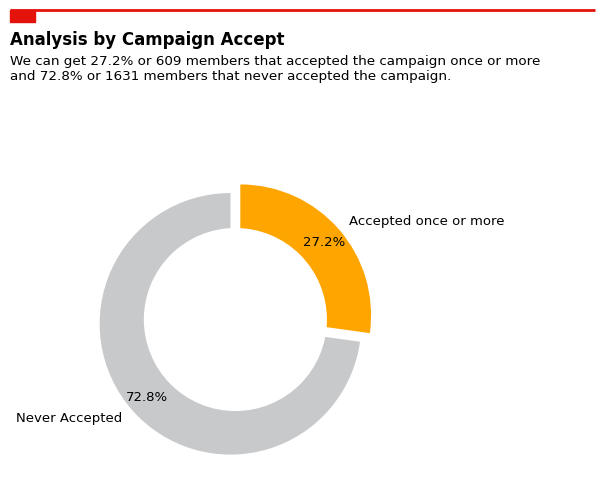

In [4]:
# calculate the customers that have accepted campaign once or more and the customers that never accepted
valueAccCamp = df['campaignAccept'].value_counts()
valueAccCamp1 = df['campaignAccept'].value_counts().reset_index()

# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 1.17], [1.12, 1.12], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.095), 0.05, 0.025, color='#E3120B'))

# add title
fig.text(
    0, 1.05, "Analysis by Campaign Accept", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    f'''We can get 27.2% or {valueAccCamp1['count'][1]} members that accepted the campaign once or more 
and 72.8% or {valueAccCamp1['count'][0]} members that never accepted the campaign.''',
    fontsize=9.7, 
    color='black'
)

# create pie chart
plt.pie(valueAccCamp, 
        colors=["#C7C9CB", '#FFA500'],
        labels=['Never Accepted', 'Accepted once or more' ], 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# # saving figure
# plt.savefig('../reports/figures/station.jpg', bbox_inches='tight')

# show
plt.tight_layout()
plt.show()

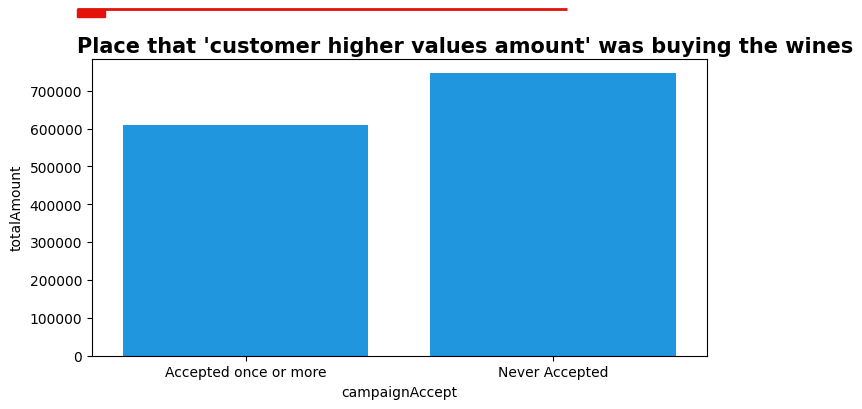

In [5]:
# Graphical total amount of member who have accepted campaign and never accepted the campaign
PivotCamp = df.pivot_table(index=['campaignAccept'],
                            values=['totalAmount'], 
                            aggfunc={'totalAmount' : 'sum'}
                            ).reset_index()

# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(7, 3))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=PivotCamp, 
    x='campaignAccept', 
    y='totalAmount',
    palette=['#009dff']
)

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Place that 'customer higher values amount' was buying the wines", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()

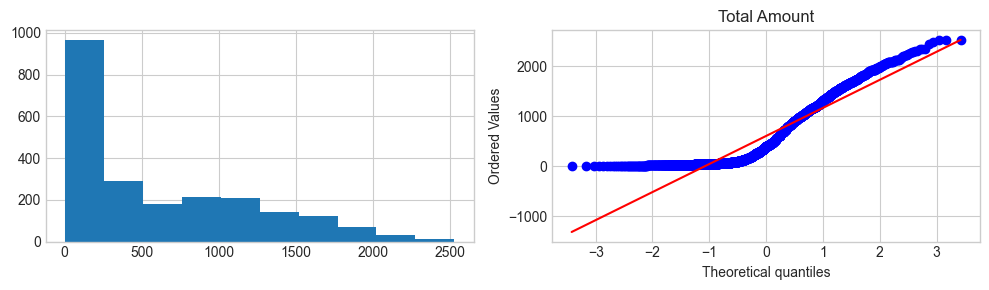

In [6]:
# Graphical test for known the distribution total amount
plt.style.use('seaborn-whitegrid')

dataFill = df['totalAmount']

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(dataFill)
stats.probplot(dataFill, plot=axes[1])

axes[1].set_title('Total Amount')

fig.tight_layout()

**Measure of Central Tendency of The Data's**

Because the distribution of the total amount's Data is **not normal**, the measure of central tendency of the Data is **median**. We should be doing hypotesis testing for proportion ***Two Sample Z-Test*** for test efectivity of the campain for statistical test. Before testing, we should to separate the data into two categorical variable that divided by the median of the data.

**HYPOTHESIS**

- H0 : Proportion of total amount with the Campaign = Proportion of total amount without the Campaign
- Ha : proportion of total amount witt the Campaign > Proportion of total amount without the Campaign

In [7]:
# find the median and separate the total amount

IncomeMed = df.totalAmount.median()

# discretization Income by median 
def discTotalAmount(df):
    if df.totalAmount < IncomeMed:
        return "LowMid"
    else:
        return "MidHigh"
    
df['discTotalAmount'] = df.apply(discTotalAmount, axis=1)

In [8]:
# number of spent category
PivotCamp2 = df[['campaignAccept','discTotalAmount']].pivot_table(
    index= 'campaignAccept',
    columns= 'discTotalAmount',
    values= 'discTotalAmount',
    aggfunc= len
)

PivotCamp2

discTotalAmount,LowMid,MidHigh
campaignAccept,,
Accepted once or more,161,448
Never Accepted,957,674


In [9]:
# number of accept campaign and Mid-High amount
nMidHighAcc = PivotCamp2.loc['Accepted once or more', 'MidHigh']

# number of never accept campaign and Mid-High amount
nMidHighNever = PivotCamp2.loc['Accepted once or more', 'MidHigh']

# number of accept customers
nAcc = PivotCamp2.sum(axis=1)['Accepted once or more']

# number of never accept customers
nNever = PivotCamp2.sum(axis=1)['Never Accepted']

from statsmodels.stats.proportion import proportions_ztest 
stat, pvalue = proportions_ztest(
    count= [nMidHighAcc, nMidHighNever],   # jml pembelian di kelompok new dan kelompok old
    nobs= [nAcc, nNever],                  # jumlah seluruh kelompok new dan jumlah seluruh kelompok old
    alternative='larger'                   # Ha (lebih besar)
)

pvalue/2
pvalue

1.1359337713483676e-87

In [10]:
# conclusion

if pvalue > 0.05:
    print(f'''
    Pvalue = {pvalue}. Pvalue > 0.05. Failure to reject Ho.
    We do not have enough evidence to say that the Proportion of total amount with the Campaign is larger between
    Proportion of total amount without the Campaign.
    (The proportions are NOT significantly different)
    ''')

else:
    print(f'''
    Pvalue = {pvalue}. Pvalue <= 0.05. Success to reject Ho.
    We have enough evidence to say that the Proportion of total amount with the Campaign is larger between
    Proportion of total amount without the Campaign.
    (The proportions are significantly different)
    ''')


    Pvalue = 1.1359337713483676e-87. Pvalue <= 0.05. Success to reject Ho.
    We have enough evidence to say that the Proportion of total amount with the Campaign is larger between
    Proportion of total amount without the Campaign.
    (The proportions are significantly different)
    


##### ***INSIGHT*** 
Although only 27.2% of members received the campaign, we can say that the campaign that has been carried out is quite effective, this can be proven by hypothesis testing for the proportion of Two Sample Z-Test which produces a p-value = 1.1359337713483676e-87. We realize that the calculation of the effectiveness of the campaign above is not optimal. This is also due to the lack of available data, especially for the comparison of the costs incurred for each campaign and the sales generated from each campaign.

### 2. How to increase 25% of sales on goods viewed from total customer purchase history amount which is influenced by **customer behavior** in the next month?

`To analyze the data, we used the data that nerver members received the campaign. 
And the steps to analyze the data are:`

    1. First, we need to know the total amount of all members and calculate the average of each month. 
    2. Calculate the target (increase 25% of the total amount).
    3. Look for items that have a higher value among others. 
    4. Find the description of the customer who has the higher value amount in Higher Amount Items.
    5. Find the place where the 'higher value amount customer' buys in the supermarket.
    6. Find the probability of 'customer with higher value amount' to purchase the Goods.
    7. Find the Confidence Interval of the 'higher value amount customer' to purchase the Goods
    8. Find the Customers that we need to increase the total Quantity of to reach the target

In [11]:
# find the total amount from all of the member
totalAmount = dfNoAccCamp['totalAmount'].sum()
totalAmountMonth = int(np.ceil(totalAmount/24)) #divide by 24 because the dataframe shows the last 2 years.

# find the target
targetAmount = int(np.ceil(totalAmountMonth*25/100))

print(f'''Total Amount from all of the member: {totalAmount} \nAverage total amount in every month : {totalAmountMonth}\nand the target of amount to increase 25%: {targetAmount}''')


Total Amount from all of the member: 747176 
Average total amount in every month : 31133
and the target of amount to increase 25%: 7784


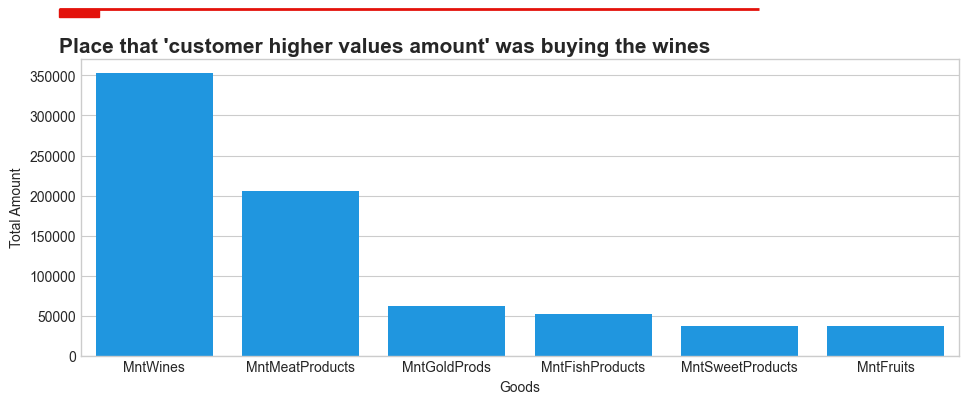

In [12]:
# find the goods that has higher values
dfTopGoods = dfNoAccCamp[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().to_frame().reset_index().sort_values(by=0, ascending=False)

# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(10, 3))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=dfTopGoods, 
    x='index', 
    y=0,
    palette=['#009dff']
).set(xlabel= 'Goods', ylabel= 'Total Amount')

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Place that 'customer higher values amount' was buying the wines", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()

In [13]:
dfTopGoods[0].max()

353443

In [14]:
for i in dfTopGoods[0]:
    if i == dfTopGoods[0].max():
        print(f'After we calculated and graphical tested we have know the goods\nthat have higher values between others is Wines with total amount: {i}')
        break

After we calculated and graphical tested we have know the goods
that have higher values between others is Wines with total amount: 353443


In [15]:
# find the customer description that has higher values amount in the wine goods.
dfWines = dfNoAccCamp[dfNoAccCamp['MntWines'] != 0]
dfWinesCal = dfWines.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'MntWines':'sum', 'ID' : 'count'}).sort_values('MntWines', ascending=False).reset_index()
dfWinesCal.nlargest(5, columns='MntWines')

,discretizatingAge,discretizatingIncome,Education,Marital_Status,Kidhome,Teenhome,MntWines,ID
0,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,10713,28
1,Early middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,8615,25
2,Late middle-aged adults,$34948.5 - $67793.5,PhD,Married,0,1,7384,19
3,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Together,0,1,7045,18
4,Older Adults,$34948.5 - $67793.5,Graduation,Married,0,1,6610,22


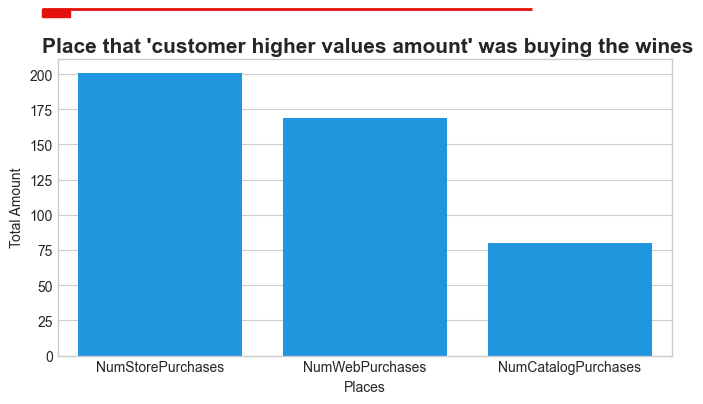

In [16]:
# Find the place that 'customer higher values amount' was buying in the wines.
dfPlaceBuyWines = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1) & (dfNoAccCamp.MntWines != 0)] 
dfPlaceBuyWines2 = dfPlaceBuyWines[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().to_frame().reset_index().sort_values(by=0, ascending=False)
# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(7, 3))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=dfPlaceBuyWines2, 
    x='index', 
    y=0,
    palette=['#009dff']
).set(xlabel= 'Places', ylabel= 'Total Amount')

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Place that 'customer higher values amount' was buying the wines", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()


In [17]:
# to validate how many of the 'customer higher values amount' was buying in the store of supermarket
dfPlaceBuyWines2 = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1) & (dfNoAccCamp.MntWines != 0) & (dfNoAccCamp.NumStorePurchases != 0)]

if len(dfPlaceBuyWines2) == dfWinesCal.ID[0]:
    print("All of the 'customer higher values amount' was buying in the store")
else: 
    print(f"There are {dfWinesCal.ID[0]-len(dfPlaceBuyWines2)} of the 'customer higher values amount'never buying in the store")

All of the 'customer higher values amount' was buying in the store


In [18]:
# find the probability as seen from customer description that has higher value in wines
prob = dfWinesCal.ID[0]/dfWinesCal.ID.sum()
prob

0.017294626312538603

After knowing the probability, we must find the confidence interval to assume the average amount of every customer to buy wines. First, we should know the distribution of the data, if distribution of data is normal measure of central tendency is mean, if not normal we should be to use the median.  

,count,mean,std,min,25%,50%,75%,max,Median
MntWines,28.0,382.607143,227.304387,21.0,227.0,366.0,591.75,895.0,366.0


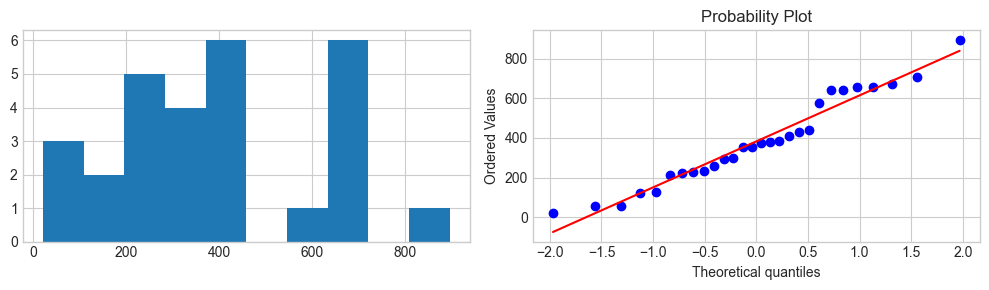

In [19]:
# DataFrame based on customer description who has the higher value amount of the wines
dfCIWines = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1)]

x = dfCIWines.MntWines

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(x)
stats.probplot(x, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(x).describe().T
df['Median'] = np.median(x)
df


,count,mean,std,min,25%,50%,75%,max,Median
0,28.0,63.316265,27.044019,9.270911,47.365445,64.638093,88.151891,115.041986,64.638093


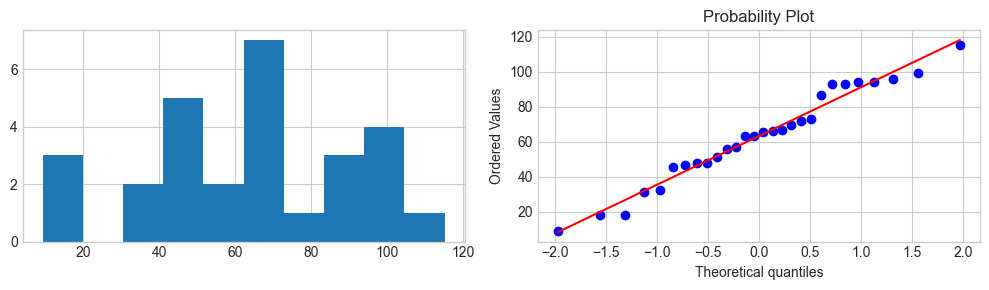

In [20]:
# box-cox transform
xt, lmbda = stats.boxcox(x)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(xt).describe().T
df['Median'] = np.median(xt)
df

In [21]:
# 95% confidence interval of mean in a transformed scale
lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))
lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

(lo_xt, hi_xt)

(52.82968962155373, 73.8028409767467)

In [22]:
# inverse transform
lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)

(lo_x, hi_x)

(268.30948978501885, 449.134233109122)

After we knowing the confident interval and to maximize the analysis results, we use the lower bound to find the total number of people that we needed to achieve the target which will be divided by the probability.

In [23]:
# action to achieve the target, find how many customers that we need to achieve the target
NeedCust = targetAmount/lo_x
# Find how many people that we should to promote in order to find the target customer(251)
NeedPeople = NeedCust/prob
print(f"We need {int(np.ceil(NeedPeople))} people to get target customer ({int(np.ceil(NeedCust))}) for achieve the target")

We need 1678 people to get target customer (30) for achieve the target


#### ***INSIGHT***

From the analysis, we can get insigth that seen from the most potential goods, namely wines, we get the most potential customers with the category:

- **age category** : Late middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **30** customers to buy wines. Judging from the probability for the most potential customers to buy wines which is ***0.017294626312538603*** we need promote about **wines** into **1678** more customer that has same or close description with the most potential customers. Focus the campaign at **the store**.

### 3. How to increase 25% of total transactions made by customers seen from the place of purchase that considers customer behavior in the next month?

`For the place section we need to analyze all places due to the need to compete in the market in the era of technological advancement. So for offline store, web, and catalog, all transactions need to be improved. To analyze the data, we used the data received by the nerver members of the campaign. And the steps to analyze the data are:`

    1. First, we need to know the total number of transactions of each member in each place and calculate the average every month. 
    2. Calculate the target (increase 25% of the total amount) of each venue.
    3. Find the description of the customer who has the most transactions at each place.
    4. Find the most frequently purchased items in each place
    5. Find the probability of 'customer with the most number of transactions.
    6. Determine the Confidence Interval of the 'customer with the highest number of transactions' to make a transaction 6.
    7. Find the Customers that we need to increase the total number of to achieve the target

In [24]:
# find total transaction from all of the member
dfPlaces = dfNoAccCamp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
dfPlaceLop = dfPlaces.to_frame().reset_index()

for i in dfPlaceLop.index:
    if i >= 0:
        print(f"Total transaction at the {dfPlaceLop['index'][i]} : {dfPlaceLop[0][i]} times")
        print(f"Average transaction per month: {int(np.ceil(dfPlaceLop[0][i]/24))} times")
        print(f"And the target increase {int(np.ceil(dfPlaceLop[0][i]/24)*(25/100))} transaction in the next month\n ")

Total transaction at the NumWebPurchases : 6067 times
Average transaction per month: 253 times
And the target increase 63 transaction in the next month
 
Total transaction at the NumCatalogPurchases : 3449 times
Average transaction per month: 144 times
And the target increase 36 transaction in the next month
 
Total transaction at the NumStorePurchases : 8944 times
Average transaction per month: 373 times
And the target increase 93 transaction in the next month
 


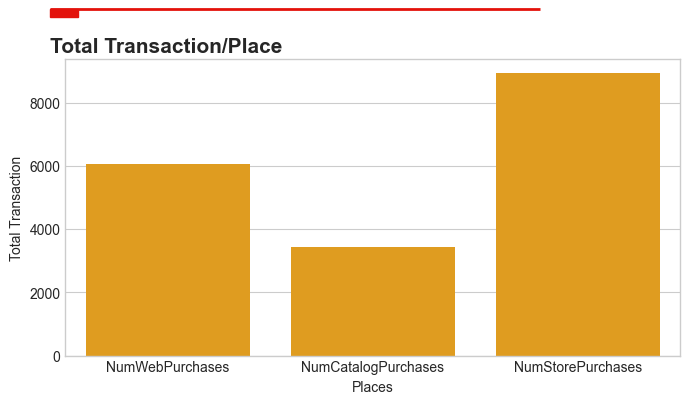

In [25]:
# find the places that has higher values transaction
dfTopPlaces = dfNoAccCamp[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum().to_frame().reset_index()

# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(7, 3))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=dfTopPlaces, 
    x='index', 
    y=0,
    palette=['#FFA500']
).set(xlabel= 'Places', ylabel= 'Total Transaction')

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Total Transaction/Place", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()


#### **-> Store Place** 

After we calculated and graphical tested:

- Total transaction at the Store : 8944 times
- Average transaction per month: 373 times 
- And the target increase 93 transaction in the next month

In [26]:
# find the customer description who most purchasing at the store places
dfStore = dfNoAccCamp[dfNoAccCamp['NumStorePurchases'] != 0]
dfStoreCal = dfStore.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumStorePurchases':'sum', 'ID' : 'count'}).sort_values('NumStorePurchases', ascending=False).reset_index()
dfStoreCal.nlargest(5, columns='NumStorePurchases')

,discretizatingAge,discretizatingIncome,Education,Marital_Status,Kidhome,Teenhome,NumStorePurchases,ID
0,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,201,28
1,Early middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,191,25
2,Older Adults,$34948.5 - $67793.5,Graduation,Married,0,1,159,22
3,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Together,0,1,150,18
4,Late middle-aged adults,$34948.5 - $67793.5,PhD,Married,0,1,146,19


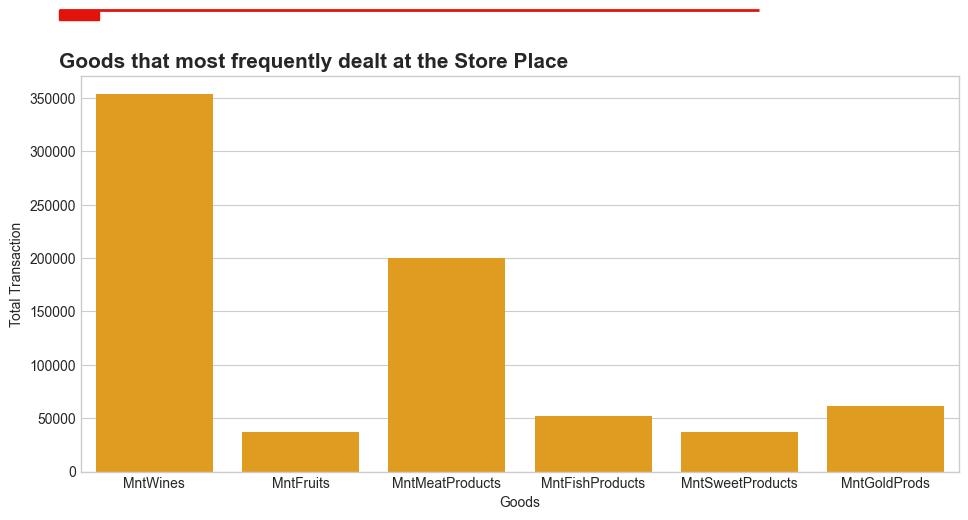

In [27]:
# find the goods that most frequently dealt at the Store Place
dfStore2 = dfStore[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().to_frame().reset_index()

# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(10, 4))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=dfStore2, 
    x='index', 
    y=0,
    palette=['#FFA500']
).set(xlabel= 'Goods', ylabel= 'Total Transaction')

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Goods that most frequently dealt at the Store Place", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()


In [28]:
# Find the probability
probPlace = dfStoreCal.ID[0]/len(dfStore)
probPlace

0.017316017316017316

After knowing the probability, we must find the confidence interval to assume the average amount of every customer to buy wines. First, we should know the distribution of the data, if distribution of data is normal measure of central tendency is mean, if not normal we should be to use the median.  

,count,mean,std,min,25%,50%,75%,max,Median
NumStorePurchases,28.0,7.178571,3.031362,3.0,4.0,7.0,8.25,13.0,7.0


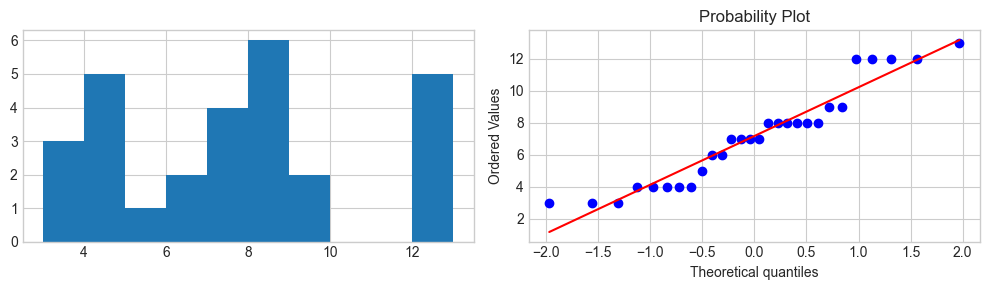

In [29]:
# DataFrame based on customer description who has total trancation at the store places
dfCIPlace = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1)]

xPlace = dfCIPlace.NumStorePurchases

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xPlace)
stats.probplot(xPlace, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(xPlace).describe().T
df['Median'] = np.median(xPlace)
df

,count,mean,std,min,25%,50%,75%,max,Median
0,28.0,2.752122,0.879387,1.347462,1.797533,2.81849,3.157591,4.215186,2.81849


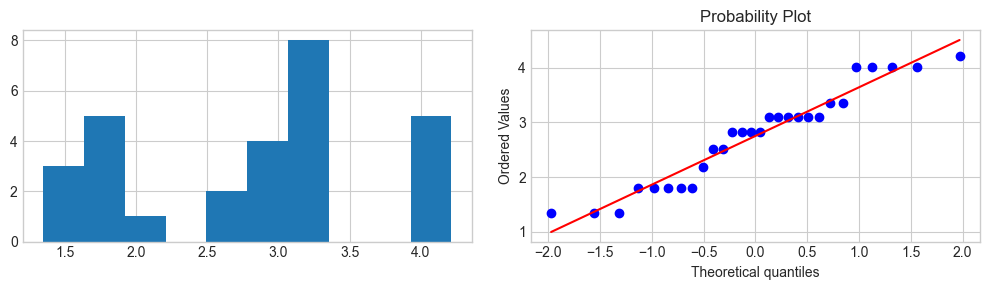

In [30]:
# box-cox transform
xtPlace, lmbda = stats.boxcox(xPlace)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xtPlace)
stats.probplot(xtPlace, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
df = pd.DataFrame(xtPlace).describe().T
df['Median'] = np.median(xtPlace)
df

In [31]:
# 95% confidence interval of mean in a transformed scale
lo_xtPlace, hi_xtPlace = stats.t.interval(1 - 0.05, len(xtPlace) - 1, loc=np.mean(xtPlace), scale=stats.sem(xtPlace))
lo_xPlace, hi_xPlace = inv_boxcox(lo_xtPlace, lmbda), inv_boxcox(hi_xtPlace, lmbda)

(lo_xtPlace, hi_xtPlace)

(2.4111312215720893, 3.093112514383417)

In [32]:
# inverse transform
lo_xPlace, hi_xPlace = inv_boxcox(lo_xtPlace, lmbda), inv_boxcox(hi_xtPlace, lmbda)

(lo_xPlace, hi_xPlace)

(5.674228550086797, 7.9965544765396475)

In [33]:
# action to achieve the target, find how many customers that we need to achieve the target
NeedCustPlace = 93/lo_xPlace

print(f"And to achieve the target we need {int(np.ceil(NeedCustPlace))} more customer for make more transaction at the store")


And to achieve the target we need 17 more customer for make more transaction at the store


In [34]:
# Find how many people that we should to promote in order to find the target customer
NeedPeoplePlace = NeedCustPlace/probPlace
print(f"We need {int(np.ceil(NeedPeoplePlace))} people to get target customer ({int(np.ceil(NeedCustPlace))}) \nfor achieve the target to increase total transaction at the store")

We need 947 people to get target customer (17) 
for achieve the target to increase total transaction at the store


#### ***INSIGHT***

From the analysis, we can get insigth that seen from the Store place, we get the most potential customers with the category:

- **age category** : Late middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **17** customers make more transaction at the store. Judging from the probability for the most potential customers make more transaction at the store which is ***0.017316017316017316*** we need make a campaign about **the store** into **947** more customer that has same or close description with the most potential customers. Focus the campaign it is about **wine**.

#### **-> Web Place**

After we calculated and graphical tested:

- Total transaction at the Web : 6067 times
- Average transaction per month: 253 times
- And the target increase 63 transaction in the next month

In [35]:
# find the customer description who most purchasing at the Web places
dfWeb = dfNoAccCamp[dfNoAccCamp['NumWebPurchases'] != 0]
dfWebCal = dfNoAccCamp.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumWebPurchases':'sum', 'ID' : 'count'}).sort_values('NumWebPurchases', ascending=False).reset_index()
                                                                                                                                                                                             
dfWebCal.nlargest(5, columns='NumWebPurchases')

,discretizatingAge,discretizatingIncome,Education,Marital_Status,Kidhome,Teenhome,NumWebPurchases,ID
0,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,169,28
1,Early middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,144,25
2,Older Adults,$34948.5 - $67793.5,Graduation,Married,0,1,120,22
3,Late middle-aged adults,$34948.5 - $67793.5,PhD,Married,0,1,100,19
4,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Together,0,1,98,18


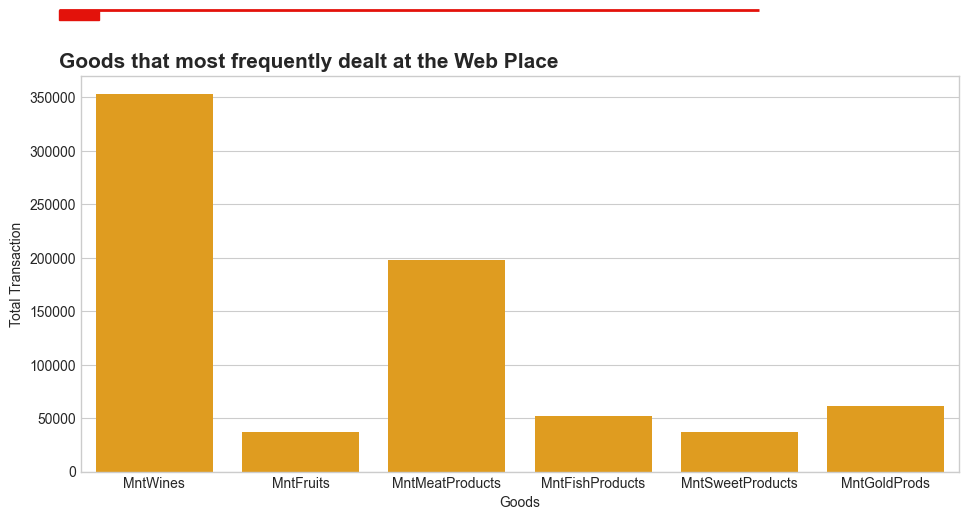

In [36]:
# find the goods that most frequently dealt at the Store Place
dfWeb2 = dfWeb[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().to_frame().reset_index()

# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(10, 4))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=dfWeb2, 
    x='index', 
    y=0,
    palette=['#FFA500']
).set(xlabel= 'Goods', ylabel= 'Total Transaction')

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Goods that most frequently dealt at the Web Place", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()

In [37]:
# Find the probability
probPlaceWeb = dfWebCal.ID[0]/len(dfWeb)
probPlaceWeb

0.017676767676767676

After knowing the probability, we must find the confidence interval to assume the average amount of every customer to buy wines. First, we should know the distribution of the data, if distribution of data is normal measure of central tendency is mean, if not normal we should be to use the median.  

,count,mean,std,min,25%,50%,75%,max,Median
NumWebPurchases,28.0,6.035714,2.659464,1.0,4.0,6.0,8.0,10.0,6.0


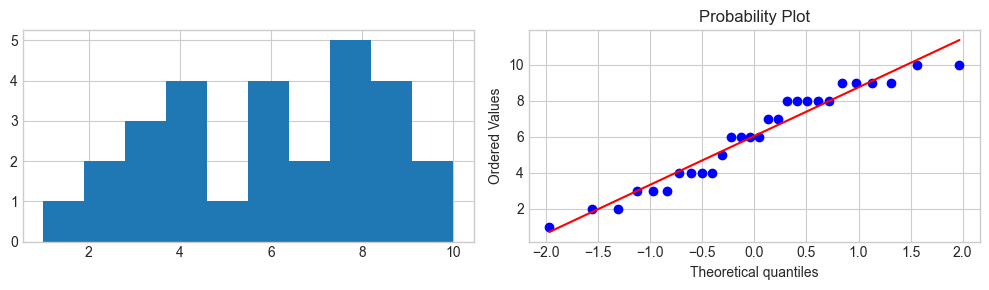

In [38]:
# DataFrame based on customer description who has total trancation at the Web places
dfCIPlaceWeb = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Late middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1)]

xPlaceWeb = dfCIPlace.NumWebPurchases

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xPlaceWeb)
stats.probplot(xPlaceWeb, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
dfCiWeb = pd.DataFrame(xPlaceWeb).describe().T
dfCiWeb['Median'] = np.median(xPlaceWeb)
dfCiWeb

,count,mean,std,min,25%,50%,75%,max,Median
0,28.0,4.880981,2.55299,0.0,2.938507,4.861618,6.768805,8.664238,4.861618


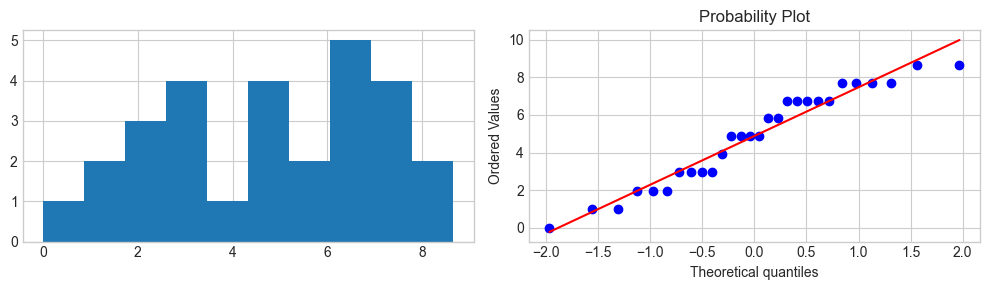

In [39]:
# box-cox transform
xtPlaceWeb, lmbda = stats.boxcox(xPlaceWeb)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xtPlaceWeb)
stats.probplot(xtPlaceWeb, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
dfCiWeb = pd.DataFrame(xtPlaceWeb).describe().T
dfCiWeb['Median'] = np.median(xtPlaceWeb)
dfCiWeb

In [40]:
# 95% confidence interval of mean in a transformed scale
lo_xtPlaceWeb, hi_xtPlaceWeb = stats.t.interval(1 - 0.05, len(xtPlaceWeb) - 1, loc=np.mean(xtPlaceWeb), scale=stats.sem(xtPlaceWeb))

(lo_xtPlaceWeb, hi_xtPlaceWeb)

(3.891035049669563, 5.870927223561772)

In [41]:
# inverse transform
lo_xPlaceWeb, hi_xPlaceWeb = inv_boxcox(lo_xtPlaceWeb, lmbda), inv_boxcox(hi_xtPlaceWeb, lmbda)

(lo_xPlaceWeb, hi_xPlaceWeb)

(4.98814727653612, 7.056684446242876)

In [42]:
# action to achieve the target, find how many customers that we need to achieve the target
NeedCust = 63/lo_xPlaceWeb

print(f"And to achieve the target we need {int(np.ceil(NeedCust))} more customer for make more transaction at the web")

And to achieve the target we need 13 more customer for make more transaction at the web


In [43]:
# Find how many people that we should to promote in order to find the target customer
NeedPeoplePlace = NeedCust/probPlace
print(f"We need {int(np.ceil(NeedPeoplePlace))} people to get target customer ({int(np.ceil(NeedCust))}) \nfor achieve the target to increase total transaction at the store")

We need 730 people to get target customer (13) 
for achieve the target to increase total transaction at the store


#### ***INSIGHT***

From the analysis, we can get insigth that seen from the Store place, we get the most potential customers with the category:

- **age category** : Late middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **13** customers make more transaction at the web. Judging from the probability for the most potential customers make more transaction at the web which is ***0.017676767676767676*** we need make a campaign about **the web** into **730** more customer that has same or close description with the most potential customers. Focus the campaign it is about **wine**.

#### **-> Catalog Place**

After we calculated and graphical tested:

- Total transaction at : 3449 times
- Average transaction per month: 144 times
- And the target increase 36 transaction in the next month

In [44]:
# find the customer description who most purchasing at the Catalog places
dfCatalog = dfNoAccCamp[dfNoAccCamp['NumCatalogPurchases'] != 0]
dfCatalogCal = dfNoAccCamp.groupby(['discretizatingAge', 'discretizatingIncome', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome']).agg({'NumCatalogPurchases':'sum', 'ID' : 'count'}).sort_values('NumCatalogPurchases', ascending=False).reset_index()
                                                                                                                                                                                             
dfCatalogCal.nlargest(5, columns='NumCatalogPurchases')

,discretizatingAge,discretizatingIncome,Education,Marital_Status,Kidhome,Teenhome,NumCatalogPurchases,ID
0,Early middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,89,25
1,Late middle-aged adults,$34948.5 - $67793.5,Graduation,Married,0,1,80,28
2,Early middle-aged adults,> $67793.5,Graduation,Married,0,0,76,12
3,Late middle-aged adults,$34948.5 - $67793.5,PhD,Married,0,1,71,19
4,Early middle-aged adults,> $67793.5,Graduation,Together,0,0,65,7


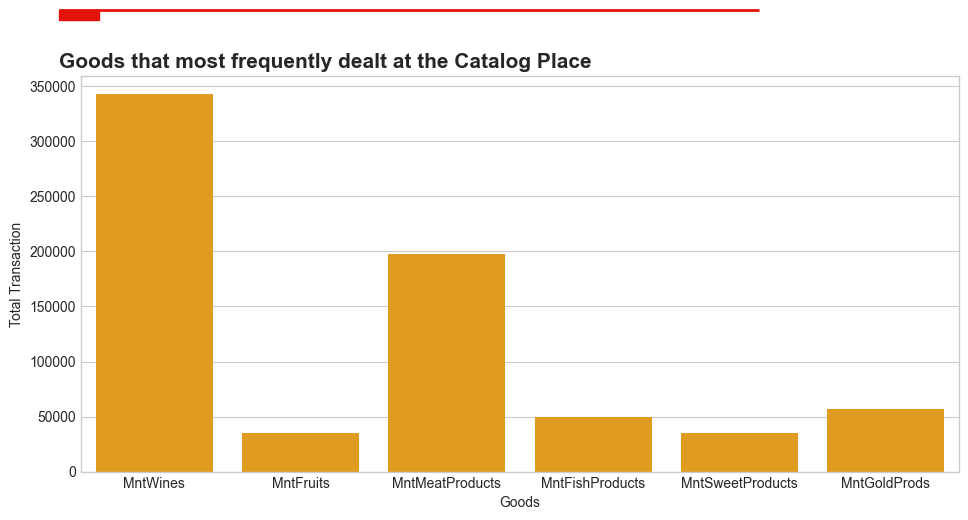

In [45]:
# find the goods that most frequently dealt at the Catalog Place
dfCatalog2 = dfCatalog[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().to_frame().reset_index()

# Inisialisasi parameter gambar
fig,ax = plt.subplots(1, 1, figsize=(10, 4))

# add line and rectangle on top.
fig.add_artist(lines.Line2D([0, 0.7], [1.265, 1.265], lw=2, color='#E3120B', solid_capstyle="butt"))
fig.add_artist(patches.Rectangle((0, 1.24), 0.04, 0.025, color='#E3120B'))

# build first line plot
sns.barplot(
    data=dfCatalog2, 
    x='index', 
    y=0,
    palette=['#FFA500']
).set(xlabel= 'Goods', ylabel= 'Total Transaction')

# make room below on top and bottom
fig.subplots_adjust(top=1.1, left=0.022)

# add title
fig.text(
    0, 1.12, "Goods that most frequently dealt at the Catalog Place", 
    fontsize=15,
    fontweight="bold", 
)

# show
plt.show()

In [46]:
# Find the probability
probPlaceCat = dfCatalogCal.ID[0]/len(dfCatalogCal)
probPlaceCat

0.05924170616113744

After knowing the probability, we must find the confidence interval to assume the average amount of every customer to buy wines. First, we should know the distribution of the data, if distribution of data is normal measure of central tendency is mean, if not normal we should be to use the median.  

,count,mean,std,min,25%,50%,75%,max,Median
NumCatalogPurchases,23.0,3.869565,2.768399,1.0,2.0,3.0,6.0,10.0,3.0


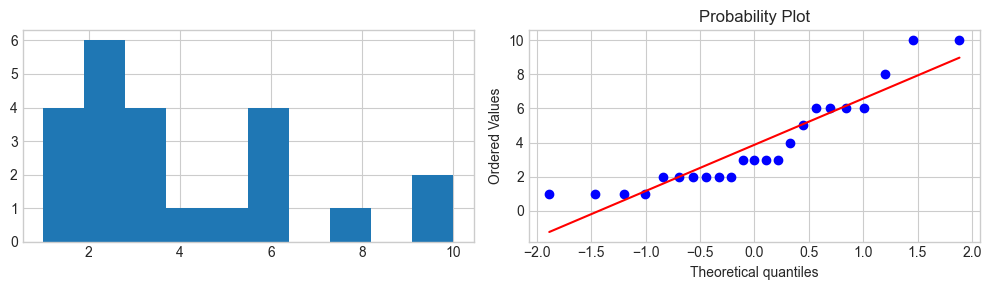

In [54]:
# DataFrame based on customer description who has total trancation at the Catalog places
dfCIPlaceCatalog = dfNoAccCamp.loc[(dfNoAccCamp.discretizatingAge == 'Early middle-aged adults') & (dfNoAccCamp.discretizatingIncome == '$34948.5 - $67793.5') & (dfNoAccCamp.Education == 'Graduation') & (dfNoAccCamp.Marital_Status == 'Married') & (dfNoAccCamp.Kidhome == 0) & (dfNoAccCamp.Teenhome == 1) & (dfNoAccCamp.NumCatalogPurchases != 0)]

xPlaceCatalog = dfCIPlaceCatalog.NumCatalogPurchases

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xPlaceCatalog)
stats.probplot(xPlaceCatalog, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
dfCiCatalog = pd.DataFrame(xPlaceCatalog).describe().T
dfCiCatalog['Median'] = np.median(xPlaceCatalog)
dfCiCatalog

,count,mean,std,min,25%,50%,75%,max,Median
0,23.0,1.103368,0.735757,0.0,0.692868,1.097911,1.789894,2.299504,1.097911


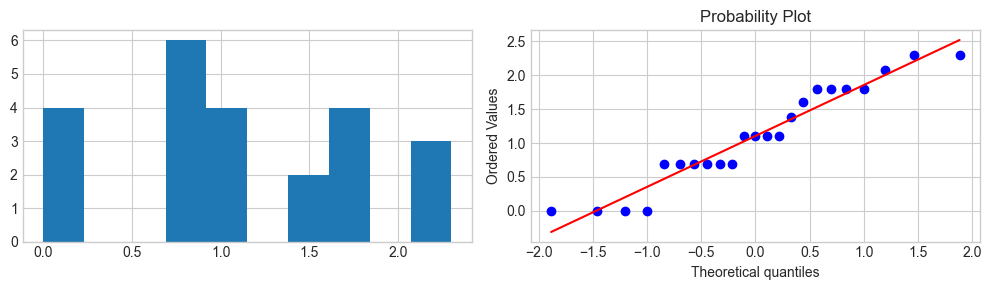

In [57]:
# box-cox transform
xtPlaceCatalog, lmbda = stats.boxcox(xPlaceCatalog)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xtPlaceCatalog)
stats.probplot(xtPlaceCatalog, dist=stats.norm, plot=axes[1])
fig.tight_layout()

# summary statistics
dfCiCatalog = pd.DataFrame(xtPlaceCatalog).describe().T
dfCiCatalog['Median'] = np.median(xtPlaceCatalog)
dfCiCatalog

In [58]:
# 95% confidence interval of mean in a transformed scale
lo_xtPlaceCatalog, hi_xtPlaceCatalog = stats.t.interval(1 - 0.05, len(xtPlaceCatalog) - 1, loc=np.mean(xtPlaceCatalog), scale=stats.sem(xtPlaceCatalog))

(lo_xtPlaceCatalog, hi_xtPlaceCatalog)

(0.7852031593638022, 1.4215334646984257)

In [59]:
# inverse transform
lo_xPlaceCatalog, hi_xPlaceCatalog = inv_boxcox(lo_xtPlaceCatalog, lmbda), inv_boxcox(hi_xtPlaceCatalog, lmbda)

(lo_xPlaceCatalog, hi_xPlaceCatalog)

(2.193639312537513, 4.148347266137175)

In [60]:
# action to achieve the target, find how many customers that we need to achieve the target
NeedCustCatalog = 36/lo_xPlaceCatalog

print(f"And to achieve the target we need {int(np.ceil(NeedCustCatalog))} more customer for make more transaction at the Catalog")


And to achieve the target we need 17 more customer for make more transaction at the Catalog


In [61]:
# Find how many people that we should to promote in order to find the target customer
NeedPeopleCatalog = NeedCustCatalog/probPlace
print(f"We need {int(np.ceil(NeedPeopleCatalog))} people to get target customer ({int(np.ceil(NeedCustCatalog))}) \nfor achieve the target to increase total transaction at the catalog")

We need 948 people to get target customer (17) 
for achieve the target to increase total transaction at the catalog


#### ***INSIGHT***

From the analysis, we can get insigth that seen from the Store place, we get the most potential customers with the category:

- **age category** : Early middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **17** customers make more transaction at the catalog. Judging from the probability for the most potential customers make more transaction at the web which is ***0.05924170616113744*** we need make a campaign about **the catalog** into **948** more customer that has same or close description with the most potential customers. Focus the campaign it is about **wine**.

## `CONCLUSION`

#### **1. Effectiveness of the campaign**
##### After conducting a proportion test on the population of members who did not accepted the campaign and accepted the campaign, it can be said that the campaign that has been carried out is quite effective.

#### **2. Increase 25% sales**

The most potential goods to increase the total amount is wines and we get the most potential customers with the category:

- **age category** : Late middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **30** customers to buy wines. Judging from the probability for the most potential customers to buy wines which is ***0.017294626312538603*** we need promote about **wines** into **1678** more customer that has same or close description with the most potential customers. Focus the campaign at **the store**.

#### **3. Increase 25% total transaction from each of place**
##### __A. From Store Place__
We get the most potential customers with the category:

- **age category** : Late middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **17** customers make more transaction at the store. Judging from the probability for the most potential customers make more transaction at the store which is ***0.017316017316017316*** we need make a campaign about **the store** into **947** more customer that has same or close description with the most potential customers. Focus the campaign it is about **wine**.
##### __B. From Web Place__
We get the most potential customers with the category:

- **age category** : Late middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **13** customers make more transaction at the web. Judging from the probability for the most potential customers make more transaction at the web which is ***0.017676767676767676*** we need make a campaign about **the web** into **730** more customer that has same or close description with the most potential customers. Focus the campaign it is about **wine**.

##### __C. From Catalog Place__
We get the most potential customers with the category:

- **age category** : Early middle-aged adults
- **income category** : $34948.5 - $67793.5
- **education level** : Graduation
- **marital status** : Married
- **kid at home** : 0
- **teen at home** : 1

To achieve the sales target of 25% increase we need an additional **17** customers make more transaction at the catalog. Judging from the probability for the most potential customers make more transaction at the web which is ***0.05924170616113744*** we need make a campaign about **the catalog** into **948** more customer that has same or close description with the most potential customers. Focus the campaign it is about **wine**.

## `RECOMENDATION`

1. For campaigns that have been carried out, it is already quite effective, but it needs to be reviewed for campaign targets and the objectives of the campaign so that it can further increase sales and total transactions.

2. To increase 25% of total sales, management can pay attention to potential customer categories and potential goods.

3. To increase 25% of transactions, management can pay attention to potential customer categories and potential goods from each point of sale (Store, Web, Catalog) of the supermarket.

4. The campaign is expected to be in accordance with the category of prospective customers. This is very much related to **customer behavior**. As if seen from **age** and **income**, it can be concluded what activities the customer is doing, if seen from the **level of education**, it can be seen how the customer thinks and considers, and if seen from **marital status** and **ownership of children**, it can be seen that his needs can be more and more because there are those who must be borne.